## EXAM EXAMPLES

This notebook solves several exercises which are similar to the Qiskit developer exam exercises.

In [34]:
import qiskit
from qiskit import *
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright


## EXERCISE 1:

Which statement will create a quantum circuit with four quantum bits and four classical bits?

A. QuantumCircuit(4, 4)<br>
B. QuantumCircuit(4)<br>
C. QuantumCircuit(QuantumRegister(4, 'qr0'), QuantumRegister(4, 'cr1'))<br>
D. QuantumCircuit([4, 4])<br>

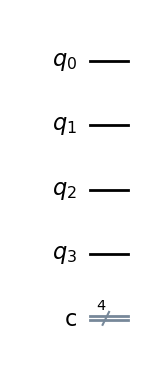

In [11]:
circuit = QuantumCircuit(4,4)
circuit.draw('mpl')

#### Answer A. is correct.
#### B. produces a circuit with four qubits and no classical registers.
#### C. produces a circuit with four qubits named qr0 and four qubits named cr1. This could be the answer if we change the second QuantumRegister() function with ClassicalRegister(4, 'cr1').
#### D. returns an error.

## EXERCISE 2:

Given this code fragment, what is the probability that a measurement would result in $|0>$ ? <br>
<br>
qc = QuantumCircuit(1)<br>
qc.ry(3 * math.pi/4, 0)<br>
<br>
A. 0.8536<br>
B. 0.5<br>
C. 0.1464<br>
D. 1.0<br>

#### Answer:
The probability of measuring $|0>$ after a y-rotation of $\frac{3\pi}{4}$ is 0.1464 since the final state is $|\psi> =   ( (\cos{(3 \pi / 4)}|0> + \sin{(3 \pi / 4)} |1> )$

Let's check it with code:

[[0.146+0.j 0.354+0.j]
 [0.354+0.j 0.854+0.j]]
!!! the 00 component of the density matrix is answer C.


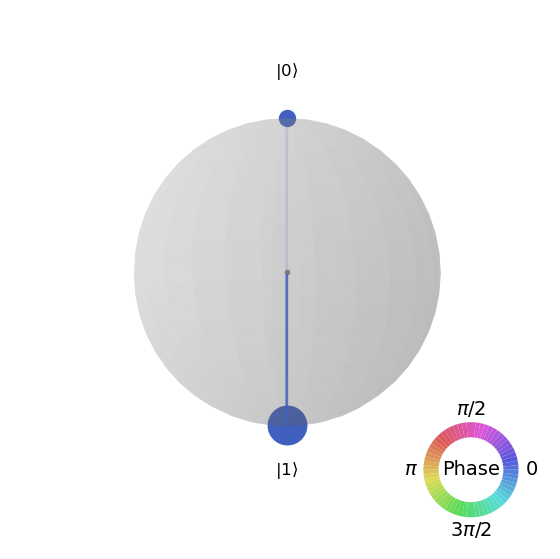

In [53]:
import math
import numpy as np
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

qc = QuantumCircuit(1)
qasm = Aer.get_backend('aer_simulator')
qc.ry(3*math.pi/4,0)
qc.save_statevector()

#qc.draw('mpl')

qasm_job = qasm.run(circuits = qc, shots = 1000)
qc_vector = qasm_job.result().get_statevector()
qc_counts = qasm_job.result().get_counts()

# if you want to generate the density matrix by hand
qc_state = np.array([qc_vector])
qc_state = np.dot(qc_state.transpose() , qc_state)
print(np.round(qc_state, decimals = 3))
print('!!! the 00 component of the density matrix is answer C.')
plot_state_qsphere(qc_state)

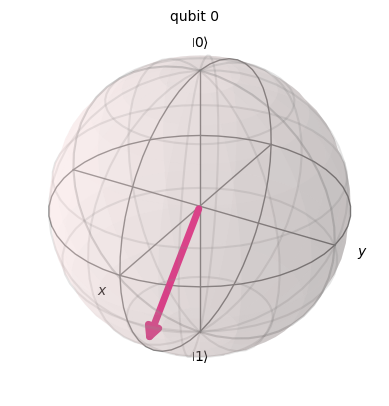

In [52]:
plot_bloch_multivector(np.array(qc_vector))

## EXERCISE 3:

Assuming the fragment below, which three code fragments would produce the circuit illustrated?

inp_reg = QuantumRegister(2, name='inp')

ancilla = QuantumRegister(1, name='anc')

qc = QuantumCircuit(inp_reg, ancilla)

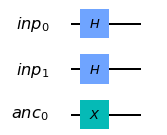

#### Possible answers:
<table table border="1" 
           align="left">
    <tr><th>A. qc.h(inp_reg) <br>
    qc.x(ancilla)<br>
    qc.draw()<br>
    <th><th>B. qc.h(inp_reg[0:2])<br>
    qc.x(ancilla[0])<br>
    qc.draw()<br>
    <th><th>C. qc.h(inp_reg[0:1])<br>
    qc.x(ancilla[0])<br>
    qc.draw()<br><tr><tr>
    <th>D. qc.h(inp_reg[0])<br>
    qc.h(inp_reg[1])<br>
    qc.x(ancilla[0])<br>
    qc.draw()<br>
    <th><th>E. qc.h(inp_reg[1])<br>
    qc.h(inp_reg[2])<br>
    qc.x(ancilla[1])<br>
    qc.draw()<br>
    <th><th>F. qc.h(inp_reg)<br>
    qc.h(inp_reg)<br>
    qc.x(ancilla)<br>
    qc.draw()<br><td><tr>
<table>

#### Correct answers: A, B, D

Answer B is not correct since inp_reg[0:1] leaves qubit inp1 with no Hadamard gate. <br>
Answer E is not correct since qc.h(inp_reg[2]) will return an error, there is no qubit inp2. <br>
Answer F is not correct since qubits inp0 and inp1 have two Hadamard gates each. <br>

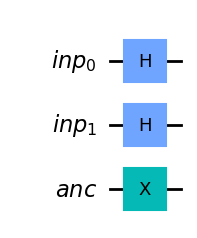

In [10]:
# This code has been done before reading the possible answers:

inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
qc = QuantumCircuit(inp_reg, ancilla)

qc.h(inp_reg)
qc.x(ancilla)

qc.draw('mpl')

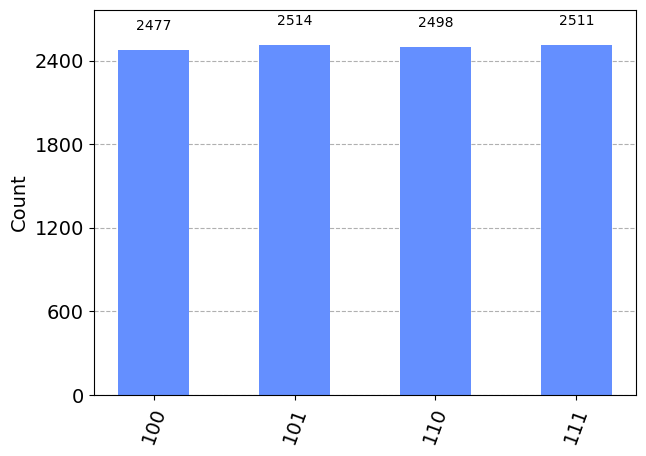

In [27]:
# As an extra, check the state resulting from this circuit.

inp_reg = QuantumRegister(2, name='inp')
ancilla = QuantumRegister(1, name='anc')
cr = ClassicalRegister(3, 'cr')
qc = QuantumCircuit(inp_reg, ancilla, cr)

qc.h(inp_reg)
qc.x(ancilla)

# Remember that in Qiskit 0.44 there is a bug that requires the initialization of 
# a backend before introducing save_statevector() in a circuit.
qasm = Aer.get_backend('aer_simulator')
qc.save_statevector()
qc.measure(inp_reg, cr[0:2])
qc.measure(ancilla, cr[2])

qasm_job = qasm.run(circuits = qc, shots = 10000)
qc_state = qasm_job.result().get_statevector()
qc_counts = qasm_job.result().get_counts()

from qiskit.visualization import plot_histogram

plot_histogram(qc_counts)

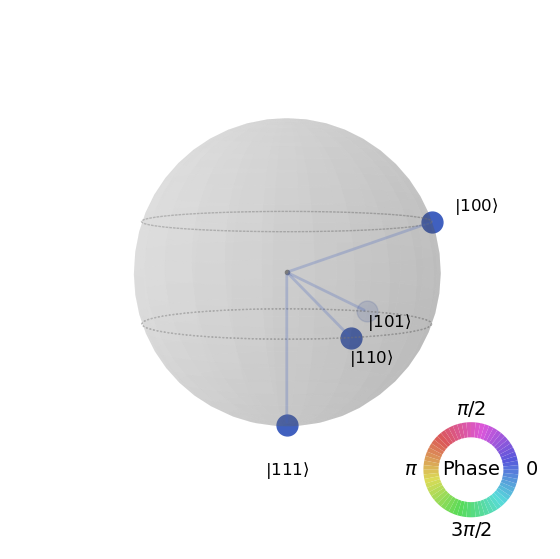

In [18]:
from qiskit.visualization import plot_state_qsphere, plot_bloch_multivector

plot_state_qsphere(qc_state)

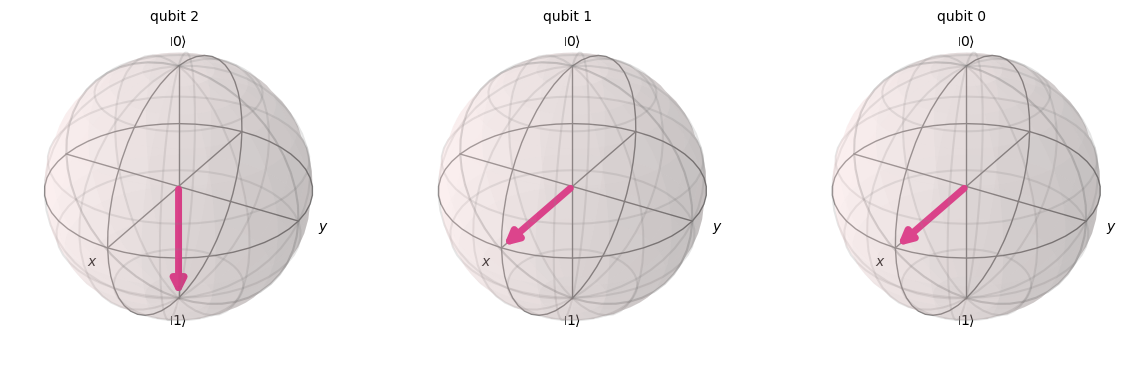

In [20]:
plot_bloch_multivector(qc_state, reverse_bits = True)

## EXERCISE 4:

Given an empty QuantumCircuit object, qc, with three qubits and three classical bits, which one of these code fragments could create this circuit?

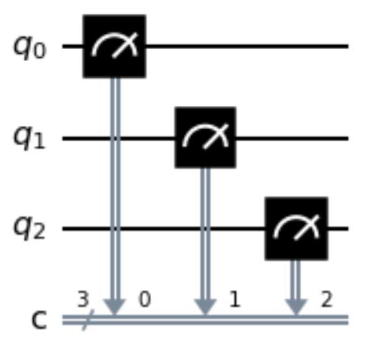

A. qc.measure([0,1,2], [0,1,2]) <br>
B. qc.measure([0,0], [1,1], [2,2]) <br>
C. qc.measure_all() <br>
D. qc.measure(0,1,2) <br>

#### Answer: the correct option is A.

If one tests B and D options the code will give an error since measure() only takes 2 positional arguments but 3 were given. <br> Option C (using measure_all()) creates three new classical registers so the measurement result is stored in the three new ones, leaving the three defined by the user with no information.

## EXERCISE 5:

Which code fragment will produce a maximally entangled, or Bell, state? <br>

A. bell = QuantumCircuit(2)<br>
bell.h(0)<br>
bell.x(1)<br>
bell.cx(0, 1)<br>
B. bell = QuantumCircuit(2)<br>
bell.cx(0, 1)<br>
bell.h(0)<br>
bell.x(1)<br>
C. bell = QuantumCircuit(2)<br>
bell.h(0)<br>
bell.x(1)<br>
bell.cz(0, 1)<br>
D. bell = QuantumCircuit(2)<br>
bell.h(0)<br>
bell.h(0)<br>

#### The correct answer is option A since the final state is $ |\Psi^+ >\frac{1}{\sqrt{2}} (|10> + |01>) $

Option B gives $ |q_1q_0>\frac{1}{\sqrt{2}} (|10> + |11>) $ which is not a Bell state. <br>
Option C gives $ |q_1q_0>\frac{1}{\sqrt{2}} (|10> - |11>) $ which is not a Bell state. <br>
Option D gives $ |q_1q_0>\frac{1}{2} (|00> + |01> +|10> + |11>) $ which is not a Bell state. <br>

In [110]:
## Let's try the different circuits and their results:
import numpy as np
from qiskit.visualization import plot_state_qsphere

def _check_circuit(circuit):
    
    if circuit.num_qubits != 2: 
        raise Exception('number of qubits must be two')
        
def circuit_A(circuit):
    
    _check_circuit(circuit)
    qasm = Aer.get_backend('aer_simulator')
        
    circuit.h(0)
    circuit.x(1)
    circuit.cx(0,1)
    
    circuit.save_statevector()
    
    return circuit, qasm

def circuit_B(circuit):
    
    _check_circuit(circuit)
    qasm = Aer.get_backend('aer_simulator')
        
    circuit.cx(0, 1)
    circuit.h(0)
    circuit.x(1)
    
    circuit.save_statevector()
    
    return circuit, qasm

def circuit_C(circuit):
    
    _check_circuit(circuit)
    qasm = Aer.get_backend('aer_simulator')
        
    circuit.h(0)
    circuit.x(1)
    circuit.cz(0,1)
    
    circuit.save_statevector()
    
    return circuit, qasm

def circuit_D(circuit):
    
    _check_circuit(circuit)
    qasm = Aer.get_backend('aer_simulator')
    
    circuit.h(0)
    circuit.h(1)
    
    circuit.save_statevector()
    
    return circuit, qasm

def _bell_define():
    
    bell_phi_plus = np.array([[np.sqrt(0.5) + 0.j, 0. + 0.j , 0. + 0.j, np.sqrt(0.5) + 0.j]])
    bell_phi_minus = np.array([[np.sqrt(0.5) + 0.j, 0. + 0.j , 0. + 0.j, - np.sqrt(0.5) + 0.j]]) 
    bell_psi_plus = np.array([[0. + 0.j, np.sqrt(0.5) + 0.j , np.sqrt(0.5) + 0.j, 0. + 0.j]]) 
    bell_psi_minus = np.array([[0. + 0.j, np.sqrt(0.5) + 0.j , - np.sqrt(0.5) + 0.j, 0. + 0.j]])
    
    return [bell_phi_plus, bell_phi_minus, bell_psi_plus, bell_psi_minus]

def bell_check(circuit, qasm):
    job = qasm.run(circuits = circuit, shots = 10000)
    state = job.result().get_statevector()
    
    bell_states = _bell_define()
    
    for bell_state in bell_states:
        a = np.array(state) == bell_state
        if a.all() == True:
            print('SUCCESS!!! The given circuit is a Bell State')
            return state
        
    print('FAIL, the given circuit is NOT a Bell State')
    return state


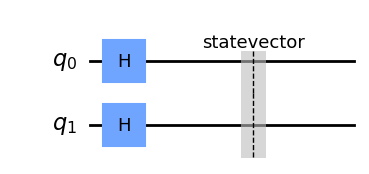

In [118]:
qc = QuantumCircuit(2)
qc, qasm = circuit_D(qc)
qc.draw('mpl')

FAIL, the given circuit is NOT a Bell State


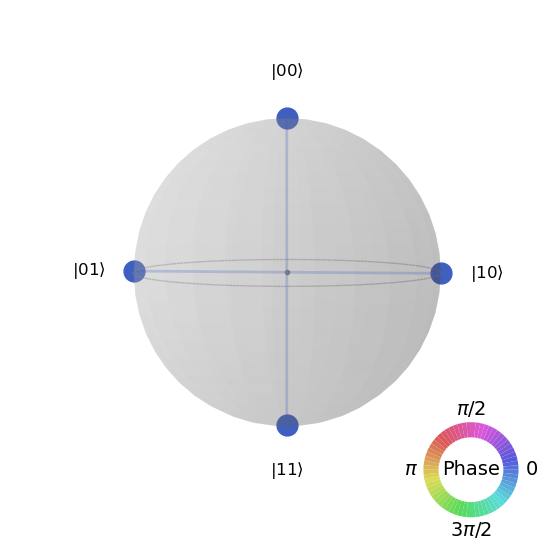

In [119]:
qc_state = bell_check(qc, qasm)
plot_state_qsphere(qc_state)

## EXERCISE 6:

Given this code, which two inserted code fragments result in the state vector represented by this Bloch sphere?

qc = QuantumCircuit(1,1) <br>
<br>
<i> # Insert fragment here </i> <br>
<br>
simulator = Aer.get_backend('statevector_simulator') <br>
job = execute(qc, simulator) <br>
result = job.result() <br>
outputstate = result.get_statevector(qc) <br>
plot_bloch_multivector(outputstate) <br>

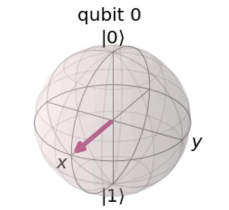

A. qc.h(0) <br>
B. qc.rx(math.pi / 2, 0) <br>
C. qc.ry(math.pi / 2, 0) <br>
D. qc.rx(math.pi / 2, 0) <br>
qc.rz(-math.pi / 2, 0) <br>
E. qc.ry(math.pi, 0) <br>

#### The correct answers are options A and C.

When applying option A., remember that $H$ = U($\pi/2$ , $0$, $\pi$) = $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix} $. So the final state after applying option A. is $|+> = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}$. <b>Option B. is correct. </b>

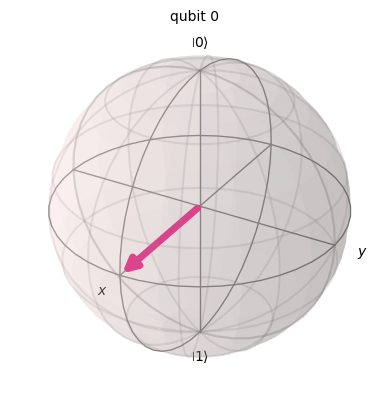

When applying option B., remember that RX($\pi/2$) = U($\pi/2$ , $3\pi/2$, $\pi/2$) = $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & - i \\ -i & 1 \end{pmatrix} $. So the final state after applying option B. is $|-i> = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -i \end{pmatrix}$. <b>Option B. is incorrect. </b>

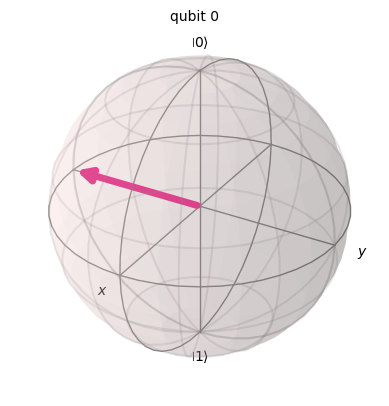


When applying option C., remember that RY($\pi/2$) = U($\pi/2$ , $0$, $0$) = $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & - 1 \\ 1 & 1 \end{pmatrix} $. So the final state after applying option B. is $|+> = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \end{pmatrix}$. <b>Option C. is correct. </b>

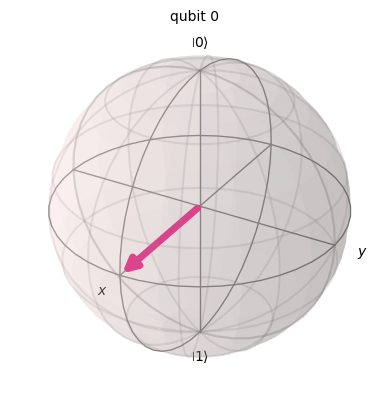

When applying option D., remember that RZ($- \pi/2$) = $ \begin{pmatrix} e^{i\pi / 4} & 0 \\ 0 & e^{- i\pi / 4} \end{pmatrix} $. So the final state after applying option D. is $|\varphi> = \frac{1}{\sqrt{2}} \begin{pmatrix} e^{i\pi / 4} \\ e^{i 5\pi / 4} \end{pmatrix} = \frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ -1 \end{pmatrix}$. <b>Option D. is incorrect. </b>

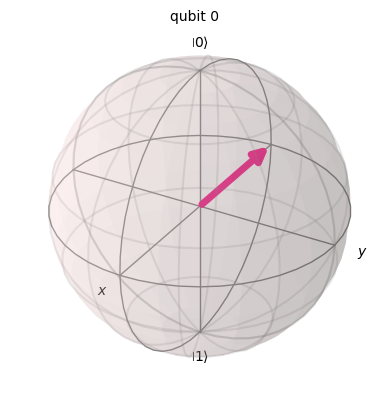

When applying option E., remember that RY($\pi$) = U($\pi$ , $0$, $0$) = $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} $. So the final state after applying option E. is $|1> = \begin{pmatrix} 0 \\ 1 \end{pmatrix}$. <b>Option E. is incorrect. </b>

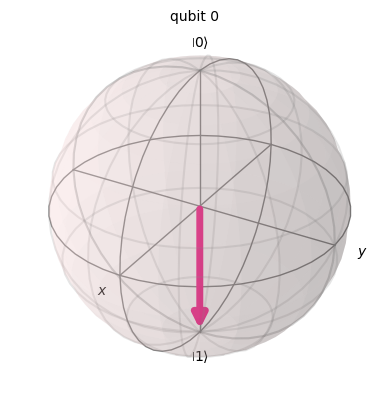

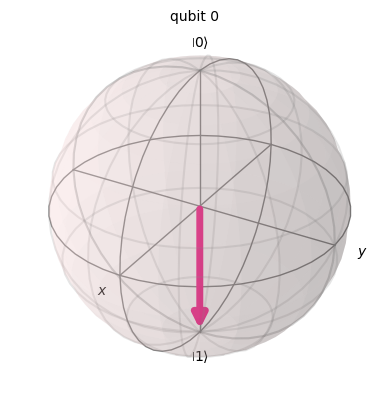

In [132]:
# We can also test the code and check these answers.

q = QuantumRegister(1, 'q')
qc = QuantumCircuit(q)
qasm = Aer.get_backend('aer_simulator')

qc.u(np.pi, 0, 0, 0)
qc.save_statevector()

qasm_job = qasm.run(circuits = qc)
qc_state = qasm_job.result().get_statevector()

from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(qc_state)

## EXERCISE 7:

$S$-gate is a Qiskit phase gate with what value of the phase parameter? <br>
<br>
A. $π/4$ <br>
B. $π/2$ <br>
C. $π/8$ <br>
D. $π$ <br>


<b>The correct answer is option B</b>

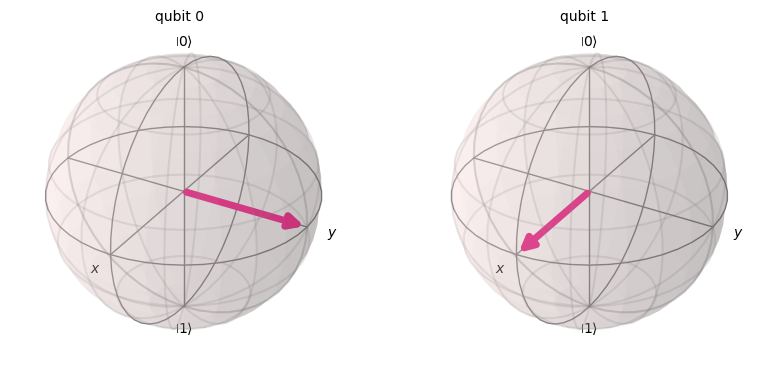

In [137]:
# We can check the correct answer:

q = QuantumRegister(2, 'q')
qc = QuantumCircuit(q)
qasm = Aer.get_backend('aer_simulator')

qc.h(q[0:2])
qc.s(q[0])
qc.save_statevector()

qasm_job = qasm.run(circuits = qc)
qc_state = qasm_job.result().get_statevector()

from qiskit.visualization import plot_bloch_multivector

plot_bloch_multivector(qc_state)

There is a difference of $π/2$ between qubit 0 and qubit 1. 

## EXERCISE 8:

Which two code fragments, when inserted into the code below, will produce the statevector shown in the output?

from qiskit import QuantumCircuit, Aer, execute <br>
from math import sqrt <br>
qc = QuantumCircuit(2) <br>

<i> # Insert fragment here </i>

simulator = Aer.get_backend('statevector_simulator') <br>
result = execute(qc, simulator).result()<br>
statevector = result.get_statevector()<br>
print(statevector)<br>

<b>Output:</b><br>
[0.707+0.j 0.+0.j 0.+0.j 0.707+0.j]

<b>A.</b> v = [1/sqrt(2), 0, 0, 1/sqrt(2)]<br>
qc.initialize(v,[0,1])<br>
<b>B.</b> qc.h(0)<br>
qc.cx(0,1)<br>
<b>C.</b> v1, v2 = [1,0], [0,1]<br>
qc.initialize(v1,0)<br>
qc.initialize(v2,1)<br>
<b>D.</b> qc.cx(0,1)<br>
qc.measure_all()<br>
<b>E.</b> qc.h(0)<br>
qc.h(1)<br>
qc.measure_all()<br>

#### ANSWER:

The desired output is the state $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} (|00> + |11>)$. <br>
Option A. is correct since it initialise the circuit in the desired state and no gate is applied. <br>
Option B. is cleary correct since after applying a Hadamard gate to the first qubit the state is $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 1 \\ 0 \end{pmatrix} = \frac{1}{\sqrt{2}} (|00> + |01>)$ and then the CNOT gate change the state to $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 0 \\ 0 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} (|00> + |11>)$. <br>
Option C. initialises qubit 0 at $|0>$ and qubit 1 at $|1>$ so the final state of the circuit is $|10>$. Option C is incorrect. <br>
Option D. is incorrect since the CNOT gate applied in the state $|00>$ does not change the state at all. <br>
Option E. is incorrect since the final state will be $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \\ 1 \\ 1 \\ 1 \end{pmatrix} = \frac{1}{\sqrt{2}} (|00> + |01> + |10> + |11>)$



Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


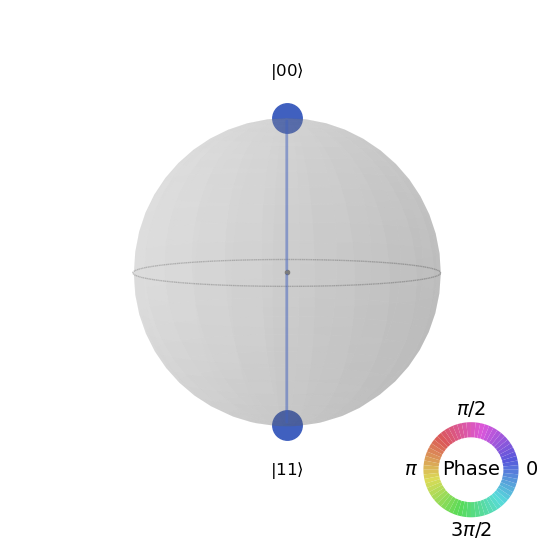

In [160]:
# Checking the code to validate the answer:

from qiskit import QuantumCircuit, Aer, execute
from math import sqrt
from qiskit.visualization import plot_bloch_multivector, plot_state_qsphere

def _check_circuit(circuit):
    if circuit.num_qubits != 2:
        raise Exception('The circuit must have two qubits')

def _option_A(circuit):
    _check_circuit(circuit)
    v = [1/sqrt(2) + 0.j, 0. + 0.j, 0. + 0.j, 1/sqrt(2) + 0.j]
    circuit.initialize(v, [0,1])
    
    return circuit

def _option_B(circuit):
    _check_circuit(circuit)
    circuit.h(0)
    circuit.cx(0,1)
    
    return circuit

def _option_C(circuit):
    _check_circuit(circuit)
    v1, v2 = [1,0], [0,1]
    circuit.initialize(v1,0)
    circuit.initialize(v2,1)
    
    return circuit

def _option_D(circuit):
    _check_circuit(circuit)
    circuit.cx(0,1)
    circuit.measure_all()
    
    return circuit

def _option_E(circuit):
    _check_circuit(circuit)
    circuit.h(0)
    circuit.h(1)
    
    return circuit

qc = QuantumCircuit(2)
qasm = Aer.get_backend('aer_simulator')

_option_A(qc)

qc.save_statevector()
qc_job = qasm.run(circuits = qc)
qc_state = qc_job.result().get_statevector()

print(qc_state)

plot_state_qsphere(qc_state)

## EXERCISE 9:

Which code fragment will produce a multi-qubit gate other than a CNOT ? <br>
<br>
<b>A.</b> qc.cx(0,1) <br>
<b>B.</b> qc.cnot(0,1) <br>
<b>C.</b> qc.mct([0],1) <br>
<b>D.</b> qc.cz(0,1) <br>

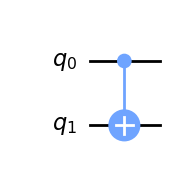

In [169]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.cnot(0,1)
qc.draw('mpl')

#### ANSWER:

Options A. and B. both produce a CNOT in qubit 1 controlled by qubit 0. These options are incorrect.<br>
Option C. is correct since it is a multi CNOT gate, meaning that it needs more than one control qubit. Next cell shows how to use mct gate properly. <br>
Option D. is correct since it produces a controlled Z gate.

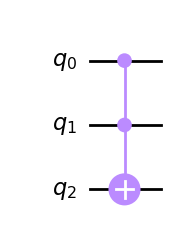

In [171]:
# CORRECT USE OF MCT GATE:

from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.mct([0,1],2)
qc.draw('mpl')